In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Define Functions

def load_data():
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name='target')
    return X, y

def detect_outliers_zscore(X, threshold=3):
    z_scores = np.abs(stats.zscore(X))
    return (z_scores > threshold).any(axis=1)

def normalize_data(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

def apply_pca(X_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X_scaled), pca

def visualize_explained_variance(pca):
    plt.figure(figsize=(6, 4))
    plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_, color='steelblue')
    plt.title('Explained Variance by PCA Components')
    plt.ylabel('Variance Ratio')
    plt.grid(True)
    plt.show()

def plot_pca_scatter(X_pca, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA Projection of Breast Cancer Data')
    plt.grid(True)
    plt.legend(title='Diagnosis')
    plt.show()

def run_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred)

In [3]:
# Step 2: Load the data
X, y = load_data()

In [4]:
# Step 3: Data Exploration
print("🔍 Dataset Overview:")
print(X.info())
print("\n Check for missing values:\n", X.isnull().sum().sum())
print("\n Check for duplicate rows:", X.duplicated().sum())
print("\n Target variable distribution:\n", y.value_counts())

🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

In [5]:
# Step 4: Outlier detection and removal
outliers = detect_outliers_zscore(X)
print(f" Outliers detected: {outliers.sum()}")
X_clean = X[~outliers]
y_clean = y[~outliers]

 Outliers detected: 74


In [6]:
# Step 5: Normalize
X_scaled = normalize_data(X_clean)

In [7]:
# Step 6: PCA - Reduce to 2 components
X_pca, pca = apply_pca(X_scaled)

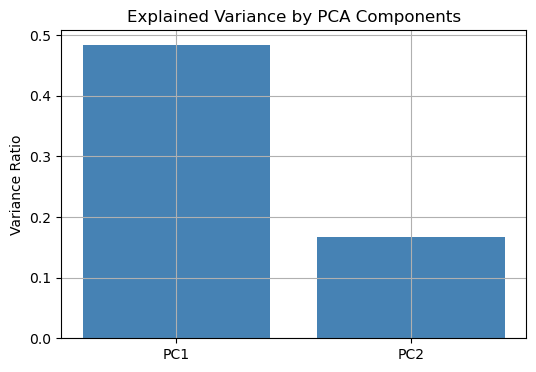

In [8]:
# Step 7: Visualize explained variance
visualize_explained_variance(pca)

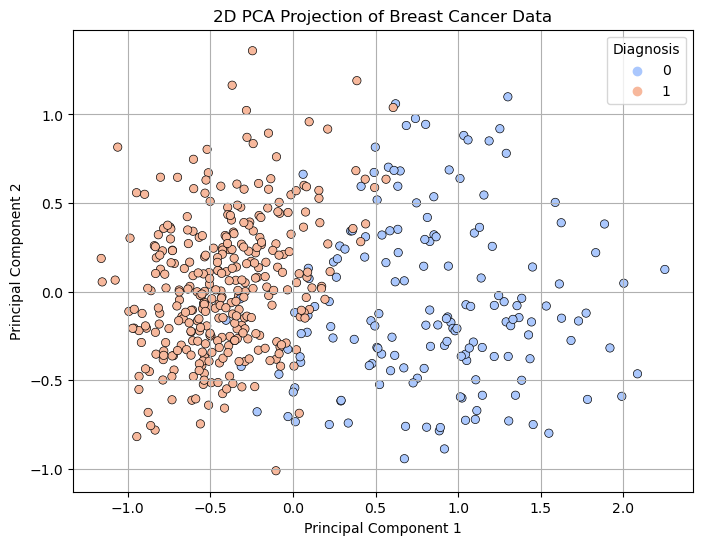

In [9]:
# Step 8: Scatter plot of PCA projection
plot_pca_scatter(X_pca, y_clean)

In [10]:
# Step 9 (Bonus): Logistic Regression on PCA-transformed data and Evaluation

# Split PCA data and labels together
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_clean, test_size=0.3, random_state=42)

# Train model
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Accuracy and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print("Model Evaluation (Logistic Regression on 2D PCA data):")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, 
                   index=['Actual: Malignant', 'Actual: Benign'], 
                   columns=['Predicted: Malignant', 'Predicted: Benign']))

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))


Model Evaluation (Logistic Regression on 2D PCA data):
Accuracy: 0.9597
Confusion Matrix:
                   Predicted: Malignant  Predicted: Benign
Actual: Malignant                    52                  4
Actual: Benign                        2                 91

 Classification Report:
              precision    recall  f1-score   support

   Malignant       0.96      0.93      0.95        56
      Benign       0.96      0.98      0.97        93

    accuracy                           0.96       149
   macro avg       0.96      0.95      0.96       149
weighted avg       0.96      0.96      0.96       149



In [11]:
# Export PCA-transformed data to CSV for use in R
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y_clean.values
pca_df.to_csv('pca_breast_cancer.csv', index=False)
print("PCA-transformed data exported to 'pca_breast_cancer.csv'")


PCA-transformed data exported to 'pca_breast_cancer.csv'
